In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [518]:
df = pd.read_csv('./data/brilliance_2.csv')
print(df.shape)
df.Price.describe()

(23343, 19)


count     23343
unique     7485
top        $699
freq         59
Name: Price, dtype: object

# Data Cleaning

In [519]:
df.columns

Index(['Unnamed: 0', 'Shape', 'Carat Weight', 'Color', 'Clarity', 'Cut',
       'Certification', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Cut Grade', 'Measurements', 'Length to Width', 'Girdle', 'Culet',
       'Fluorescence', 'Stock Number', 'Price'],
      dtype='object')

In [520]:
# fix price formatting
df['Price'] = df['Price'].map(lambda x: x.replace('$',''))
df['Price'] = df['Price'].map(lambda x: x.replace(',',''))
df['Price'] = df['Price'].astype(int)

In [521]:
df['Price'].dtypes

dtype('int64')

In [522]:
df.sort_values(['Price'], inplace = True)
df.head(2)

,Unnamed: 0,Shape,Carat Weight,Color,Clarity,Cut,Certification,Depth %,Table %,Polish,Symmetry,Cut Grade,Measurements,Length to Width,Girdle,Culet,Fluorescence,Stock Number,Price
14511,14511,Round,0.30 ct.,K,SI1,Ideal,GIA,62.8 %,55 %,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
5628,5628,Round,0.30 ct.,K,SI1,Ideal,GIA,62.8 %,55 %,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314


<AxesSubplot:xlabel='Price', ylabel='Count'>

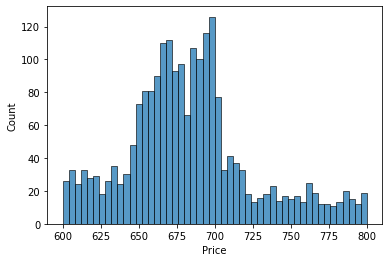

In [523]:
# excess amount of samples between $600 and $800 -- deal with later
sns.histplot(data=df,x='Price',bins=50,binrange=(600,800))

In [524]:
# drop two columns
df.drop(['Unnamed: 0','Shape','Certification'],axis=1,inplace=True)

In [525]:
df['Carat Weight'] = df['Carat Weight'].map(lambda x: x.replace('ct.',''))
df['Carat Weight'] = df['Carat Weight'].astype(float)

In [526]:
df[['Depth %', 'Table %']] = df[['Depth %', 'Table %']].apply(lambda x: x.str.replace('%','').str.strip()).astype(float)
df.head()

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Cut Grade,Measurements,Length to Width,Girdle,Culet,Fluorescence,Stock Number,Price
14511,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
5628,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
14814,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
4191,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
2415,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314


In [527]:
print(df['Color'].value_counts(),'\n')
color_d = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'K':8}
df['Color'] = df['Color'].map(color_d)
df['Color']

D    4515
E    3843
F    3488
G    3276
H    2578
I    2164
J    2044
K    1435
Name: Color, dtype: int64 



14511    8
5628     8
14814    8
4191     8
2415     8
        ..
14506    1
14507    4
14508    3
14509    6
14510    7
Name: Color, Length: 23343, dtype: int64

In [528]:
print(df['Clarity'].value_counts(),'\n')
clar_d = {'FL':1,'IF':2,'VVS1':3,'VVS2':4,'VS1':5,'VS2':6,'SI1':7,'SI2':8}
df['Clarity'] = df['Clarity'].map(clar_d)
df['Clarity']

VS1     5053
VS2     4584
VVS2    3827
SI1     3299
VVS1    2688
SI2     2244
IF      1492
FL       156
Name: Clarity, dtype: int64 



14511    7
5628     7
14814    7
4191     7
2415     7
        ..
14506    5
14507    6
14508    6
14509    4
14510    6
Name: Clarity, Length: 23343, dtype: int64

In [529]:
print(df['Cut'].value_counts(),'\n')
cut_d = {'Super Ideal':1, 'Ideal':2,'Excellent':3,'Very Good':4, 'Good':5}
df['Cut'] = df['Cut'].map(cut_d)
df['Cut']

Super Ideal    15766
Ideal           3178
Excellent       2309
Very Good       1781
Good             309
Name: Cut, dtype: int64 



14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    3
14507    1
14508    1
14509    5
14510    1
Name: Cut, Length: 23343, dtype: int64

In [530]:
print(df['Polish'].value_counts(),'\n')
pol_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Polish'] = df['Polish'].map(pol_d)
df['Polish']

Excellent    21622
Very Good     1638
Good            83
Name: Polish, dtype: int64 



14511    1
5628     1
14814    1
4191     1
2415     1
        ..
14506    1
14507    1
14508    1
14509    1
14510    1
Name: Polish, Length: 23343, dtype: int64

In [531]:
print(df['Symmetry'].value_counts(),'\n')
sym_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Symmetry'] = df['Symmetry'].map(sym_d)
df['Symmetry']

Excellent    18218
Very Good     4547
Good           578
Name: Symmetry, dtype: int64 



14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    1
14507    1
14508    1
14509    2
14510    1
Name: Symmetry, Length: 23343, dtype: int64

In [532]:
print(df['Cut Grade'].value_counts())
cut_d = {'Excellent':1,'Very Good':2,'Good':3,'Fair':4,'Poor':5}
df['Cut Grade'] = df['Cut Grade'].map(cut_d)
df['Cut Grade']

Excellent    18247
Very Good     4134
Good           844
Fair           115
Poor             3
Name: Cut Grade, dtype: int64


14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    2
14507    1
14508    1
14509    3
14510    1
Name: Cut Grade, Length: 23343, dtype: int64

In [533]:
df.dtypes

Carat Weight       float64
Color                int64
Clarity              int64
Cut                  int64
Depth %            float64
Table %            float64
Polish               int64
Symmetry             int64
Cut Grade            int64
Measurements        object
Length to Width    float64
Girdle              object
Culet               object
Fluorescence        object
Stock Number        object
Price                int64
dtype: object

In [534]:
df['Culet'].value_counts()
culet_d = {'None':1, 'Very Small':2,'Small':3,'Medium':4}
df['Culet'] = df['Culet'].map(culet_d)
df['Culet'].fillna(value=0, inplace = True)
df['Culet'] = df['Culet'].astype(int)

In [535]:
df['Culet'].value_counts()

1    19527
0     3701
2       94
3       17
4        4
Name: Culet, dtype: int64

In [536]:
df['Fluorescence'].value_counts()
flo_d = {'None':1,'Faint':2,'Medium':3,'Strong':4}
df['Fluorescence'] = df['Fluorescence'].map(flo_d)
df['Fluorescence']

14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    1
14507    1
14508    1
14509    3
14510    1
Name: Fluorescence, Length: 23343, dtype: int64

In [537]:
df_idk = df[['Girdle', 'Measurements', 'Stock Number']]
df.drop(['Girdle','Measurements','Stock Number'],axis=1,inplace=True)
df.head(2)

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Cut Grade,Length to Width,Culet,Fluorescence,Price
14511,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,2,314
5628,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,2,314


In [538]:
df.drop(df[df['Price'] < 500].index, inplace = True)

In [539]:
df.to_csv('./data/brilliance_clean.csv',index=False)

# Basic Feature 'Engineering'

In [540]:
df['Symmetry'].value_counts()

# combine Fair and Poor
cut_d = {1:1,2:2,3:3,4:4,5:4}
df['Cut Grade'] = df['Cut Grade'].map(cut_d)

In [541]:
df['Culet'].value_counts()

# combine very small, small, medium to same category
culet_d = {1:1, 2:2,3:2,4:2}
df['Culet'] = df['Culet'].map(culet_d)

In [542]:
df['Culet']=df['Culet'].fillna(.01)

<AxesSubplot:xlabel='Carat Weight', ylabel='Price'>

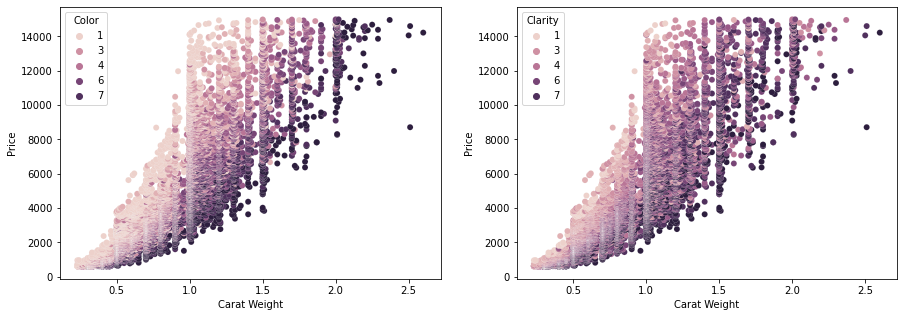

In [543]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.scatterplot(ax=ax[0],data=df,x='Carat Weight',y='Price',hue='Color',linewidth=.1)
sns.scatterplot(ax=ax[1],data=df,x='Carat Weight',y='Price',hue='Clarity',linewidth=.1)
#sns.scatterplot(ax=ax[1][0],data=df,x='Carat Weight',y='Price',hue='Cut',linewidth=.1)
#sns.scatterplot(ax=ax[1][1],data=df,x='Carat Weight',y='Price',hue='Fluorescence',linewidth=.1)

In [544]:
df['FourC'] = df['Carat Weight'] * df['Color'] * df['Clarity'] * df['Cut']
df['DT Ratio'] = df['Depth %'] / df['Table %']
df['Carat Color'] = df['Color'] ** (df['Carat Weight'])
df['Carat Clarity'] = df['Clarity'] ** (df['Carat Weight'])
df['Shine'] = df['Polish'] * df['Symmetry'] * df['Fluorescence']

In [545]:
#df['Cut SQ'] = df['Cut'] * df['Cut']
#df['Culet SQ'] = df['Culet'] * df['Culet']
#df['Color SQ'] = df['Color'] * df['Color']

In [546]:
df.corr().loc['Price']

Carat Weight       0.874669
Color              0.052560
Clarity           -0.019061
Cut               -0.088927
Depth %           -0.005288
Table %            0.039046
Polish            -0.096157
Symmetry          -0.109510
Cut Grade         -0.102911
Length to Width   -0.041874
Culet              0.157478
Fluorescence       0.022489
Price              1.000000
FourC              0.202445
DT Ratio          -0.029426
Carat Color        0.419116
Carat Clarity      0.541583
Shine             -0.068876
Name: Price, dtype: float64

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23205 entries, 546 to 14510
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Carat Weight     23205 non-null  float64
 1   Color            23205 non-null  int64  
 2   Clarity          23205 non-null  int64  
 3   Cut              23205 non-null  int64  
 4   Depth %          23205 non-null  float64
 5   Table %          23205 non-null  float64
 6   Polish           23205 non-null  int64  
 7   Symmetry         23205 non-null  int64  
 8   Cut Grade        23205 non-null  int64  
 9   Length to Width  23205 non-null  float64
 10  Culet            23205 non-null  float64
 11  Fluorescence     23205 non-null  int64  
 12  Price            23205 non-null  int64  
 13  FourC            23205 non-null  float64
 14  DT Ratio         23205 non-null  float64
 15  Carat Color      23205 non-null  float64
 16  Carat Clarity    23205 non-null  float64
 17  Shine     

In [548]:
df.to_csv('./data/brilliance_new_features.csv',index=False)